<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.2: Feature Selection

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### 5. Forward Feature Selection

> Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Create a Regression model using Forward Feature Selection by looping over all the features adding one at a time until there are no improvements on the prediction metric ( R2  and  AdjustedR2  in this case).

#### 5.1 Load Wine Data & Define Predictor and Target

In [3]:
## Load the wine quality dataset

# Load the wine dataset from csv
wine = pd.read_csv('C:/Users/victo/Documents/Institute_of_Data/DATA/winequality_merged.csv')

# define the target variable (dependent variable) as y
y = wine['quality']

# Take all columns except target as predictor columns
predictor_columns = [c for c in wine.columns if c != 'quality']
# Load the dataset as a pandas data frame
X = pd.DataFrame(wine, columns = predictor_columns)

In [9]:
predictor_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'red_wine']

In [12]:
#predictor_2 = wine.drop('quality', axis=1).values  

In [13]:
#predictor_2

array([[ 7.4 ,  0.7 ,  0.  , ...,  0.56,  9.4 ,  1.  ],
       [ 7.8 ,  0.88,  0.  , ...,  0.68,  9.8 ,  1.  ],
       [ 7.8 ,  0.76,  0.04, ...,  0.65,  9.8 ,  1.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  0.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  0.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  0.  ]])

In [4]:
predictor_2_df = wine.drop('quality', axis=1) #another option to select predictor variables

In [5]:
predictor_2_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0


In [6]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0


In [7]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### 5.2 Overview of the code below

The external `while` loop goes forever until there are no improvements to the model, which is controlled by the flag `changed` (until is **not** changed).
The inner `for` loop goes over each of the features not yet included in the model and calculates the correlation coefficient. If any model improves on the previous best model then the records are updated.

#### Code variables
- `included`: list of the features (predictors) that were included in the model; starts empty.
- `excluded`: list of features that have **not** been included in the model; starts as the full list of features.
- `best`: dictionary to keep record of the best model found at any stage; starts 'empty'.
- `model`: object of class LinearRegression, with default values for all parameters.

#### Methods of the `LinearRegression` object to investigate
- `fit()`
- `fit.score()`

#### Adjusted $R^2$ formula
$$Adjusted \; R^2 = 1 - { (1 - R^2) (n - 1)  \over n - k - 1 }$$

#### Linear Regression [reference](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [20]:
## Flag intermediate output

show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

In [17]:
X_train.shape[0]

5197

In [21]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the training data
n = X_train.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        # number of predictors in this model
        k = len(included + [new_column])
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = alcohol, density, free sulfur dioxide, residual sugar, citric acid, chlorides, total sulfur dioxide, pH, sulphates, fixed acidity, volatile acidity, red_wine
(Step) Trying alcohol...
(Step) - Features = alcohol
(Step) - Adjusted R^2: This = 0.190; Best = 0.000
(Step) - New Best!   : Feature = alcohol; R^2 = 0.190; Adjusted R^2 = 0.190
(Step) Trying density...
(Step) - Features = density
(Step) - Adjusted R^2: This = 0.087; Best = 0.190
(Step) Trying free sulfur dioxide...
(Step) - Features = free sulfur dioxide
(Step) - Adjusted R^2: This = 0.002; Best = 0.190
(Step) Trying residual sugar...
(Step) - Features = residual sugar
(Step) - Adjusted R^2: This = 0.001; Best = 0.190
(Step) Trying citric acid...
(Step) - Features = citric acid
(Step) - Adjusted R^2: This = 0.010; Best = 0.190
(Step) Trying chlorides...
(Step) - Features = chlorides
(Step) - Adjusted R^2: This = 0.039; Best = 0.190
(Step) Trying total sulfur dioxide...
(Step) - Features = total sulfur dioxide


(Step) - Adjusted R^2: This = 0.276; Best = 0.279
Added feature density with R^2 = 0.279 and adjusted R^2 = 0.279

(Step) Excluded = free sulfur dioxide, citric acid, chlorides, total sulfur dioxide, pH, fixed acidity
(Step) Trying free sulfur dioxide...
(Step) - Features = alcohol, volatile acidity, sulphates, residual sugar, red_wine, density, free sulfur dioxide
(Step) - Adjusted R^2: This = 0.280; Best = 0.279
(Step) - New Best!   : Feature = free sulfur dioxide; R^2 = 0.281; Adjusted R^2 = 0.280
(Step) Trying citric acid...
(Step) - Features = alcohol, volatile acidity, sulphates, residual sugar, red_wine, density, citric acid
(Step) - Adjusted R^2: This = 0.278; Best = 0.280
(Step) Trying chlorides...
(Step) - Features = alcohol, volatile acidity, sulphates, residual sugar, red_wine, density, chlorides
(Step) - Adjusted R^2: This = 0.279; Best = 0.280
(Step) Trying total sulfur dioxide...
(Step) - Features = alcohol, volatile acidity, sulphates, residual sugar, red_wine, density,

# EXAMPLE FROM KAGGLE - Sequential Feature Selector

 Sequential Forward Selection (SFS)
SFS finds the best subset of feature by adding a feature that best improves the model at each iteration.

Mlxtend provides SequentialFeatureSelector function to perform SFS.

https://www.kaggle.com/ar2017/basics-of-feature-selection-with-python#2.0.-Wrapper-Methods

In [54]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [8]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [9]:
lr= LinearRegression()

sfs = SFS(estimator=lr, k_features=(2, 4), forward=True, scoring='r2', cv=5)

sfs.fit(X, y)

 # k_score_ shows the best score 
print('Best r2 score:', sfs.k_score_) 

# k_feature_idx_ shows the index of features /location of features
print("Selected feature's indices:", sfs.k_feature_idx_)

# k_feature_names_ shows the feature names 
print('Selected features:', sfs.k_feature_names_)

Best r2 score: 0.25255977980882427
Selected feature's indices: (1, 3, 10, 11)
Selected features: ('volatile acidity', 'residual sugar', 'alcohol', 'red_wine')


In [10]:
print('Best r2 score: %.2f' % sfs.k_score_)

Best r2 score: 0.25


In [35]:
#compare SFS method to correlation method, which is another method to select features

abs(wine.corr()['quality']).sort_values(ascending=False).drop('quality')

alcohol                 0.444319
density                 0.305858
volatile acidity        0.265699
chlorides               0.200666
red_wine                0.119323
citric acid             0.085532
fixed acidity           0.076743
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
sulphates               0.038485
residual sugar          0.036980
pH                      0.019506
Name: quality, dtype: float64

In [11]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


In [37]:
sfs.subsets_

{1: {'feature_idx': (10,),
  'cv_scores': array([0.19737904, 0.14259664, 0.16402737, 0.25951304, 0.11718204]),
  'avg_score': 0.17613962742677963,
  'feature_names': ('alcohol',)},
 2: {'feature_idx': (1, 10),
  'cv_scores': array([0.25002068, 0.23000381, 0.21328574, 0.2912951 , 0.1659067 ]),
  'avg_score': 0.23010240552676492,
  'feature_names': ('volatile acidity', 'alcohol')},
 3: {'feature_idx': (1, 10, 11),
  'cv_scores': array([0.30485787, 0.2238263 , 0.22070722, 0.29339553, 0.18436065]),
  'avg_score': 0.24542951400317423,
  'feature_names': ('volatile acidity', 'alcohol', 'red_wine')},
 4: {'feature_idx': (1, 3, 10, 11),
  'cv_scores': array([0.28782052, 0.20295259, 0.24483178, 0.31213809, 0.21505592]),
  'avg_score': 0.25255977980882427,
  'feature_names': ('volatile acidity',
   'residual sugar',
   'alcohol',
   'red_wine')}}

In [38]:
sfs

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(2, 4),
                          scoring='r2')

In [51]:
# Show the performance of each subset of features considered by SFS
sfs_results = pd.DataFrame(sfs.subsets_).T
sfs_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(10,)","[0.19737904387349925, 0.14259663666035804, 0.1...",0.17614,"(alcohol,)"
2,"(1, 10)","[0.2500206830055284, 0.23000380680200472, 0.21...",0.230102,"(volatile acidity, alcohol)"
3,"(1, 10, 11)","[0.3048578726360328, 0.22382630198305953, 0.22...",0.24543,"(volatile acidity, alcohol, red_wine)"
4,"(1, 3, 10, 11)","[0.28782051528160646, 0.20295258640245806, 0.2...",0.25256,"(volatile acidity, residual sugar, alcohol, re..."


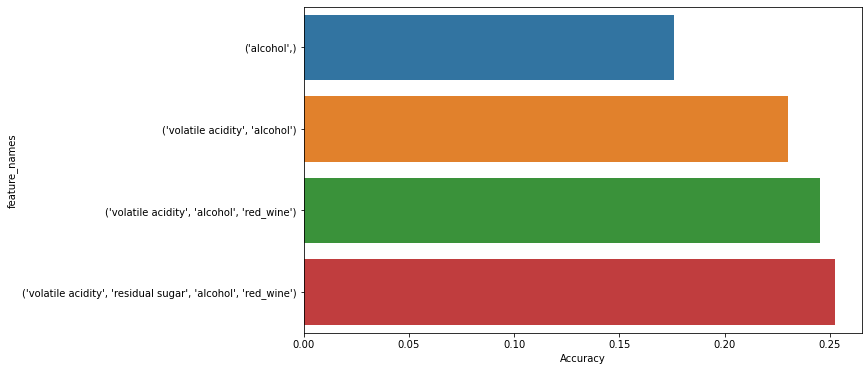

In [53]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x= sfs_results['avg_score'], y= sfs_results['feature_names'],  orient='h')
ax.set_xlabel('Accuracy')

plt.show()

In [60]:
len(wine.columns)

13

In [12]:
lr= LinearRegression()

sfs = SFS(estimator=lr, k_features=(2, 12), forward=True, scoring='r2', cv=5)

sfs.fit(X, y)

 # k_score_ shows the best score 
print('Best r2 score:', sfs.k_score_) 

# k_feature_idx_ shows the index of features /location of features
print("Selected feature's indices:", sfs.k_feature_idx_)

# k_feature_names_ shows the feature names 
print('Selected features:', sfs.k_feature_names_)

Best r2 score: 0.2582839757951002
Selected feature's indices: (1, 2, 3, 4, 5, 6, 9, 10, 11)
Selected features: ('volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol', 'red_wine')


In [62]:
sfs_results = pd.DataFrame(sfs.subsets_).T
sfs_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(10,)","[0.19737904387349925, 0.14259663666035804, 0.1...",0.17614,"(alcohol,)"
2,"(1, 10)","[0.2500206830055284, 0.23000380680200472, 0.21...",0.230102,"(volatile acidity, alcohol)"
3,"(1, 10, 11)","[0.3048578726360328, 0.22382630198305953, 0.22...",0.24543,"(volatile acidity, alcohol, red_wine)"
4,"(1, 3, 10, 11)","[0.28782051528160646, 0.20295258640245806, 0.2...",0.25256,"(volatile acidity, residual sugar, alcohol, re..."
5,"(1, 3, 9, 10, 11)","[0.29759459759474427, 0.2153593595611346, 0.24...",0.255297,"(volatile acidity, residual sugar, sulphates, ..."
6,"(1, 3, 4, 9, 10, 11)","[0.3021192913374985, 0.21801268374016858, 0.24...",0.256348,"(volatile acidity, residual sugar, chlorides, ..."
7,"(1, 2, 3, 4, 9, 10, 11)","[0.3031435412607394, 0.2183917324557676, 0.242...",0.256764,"(volatile acidity, citric acid, residual sugar..."
8,"(1, 2, 3, 4, 5, 9, 10, 11)","[0.29269835001468003, 0.22263425980497642, 0.2...",0.256639,"(volatile acidity, citric acid, residual sugar..."
9,"(1, 2, 3, 4, 5, 6, 9, 10, 11)","[0.3034229006984819, 0.221686319721479, 0.2468...",0.258284,"(volatile acidity, citric acid, residual sugar..."
10,"(1, 2, 3, 4, 5, 6, 8, 9, 10, 11)","[0.2948739549544547, 0.22175881373542972, 0.24...",0.256358,"(volatile acidity, citric acid, residual sugar..."


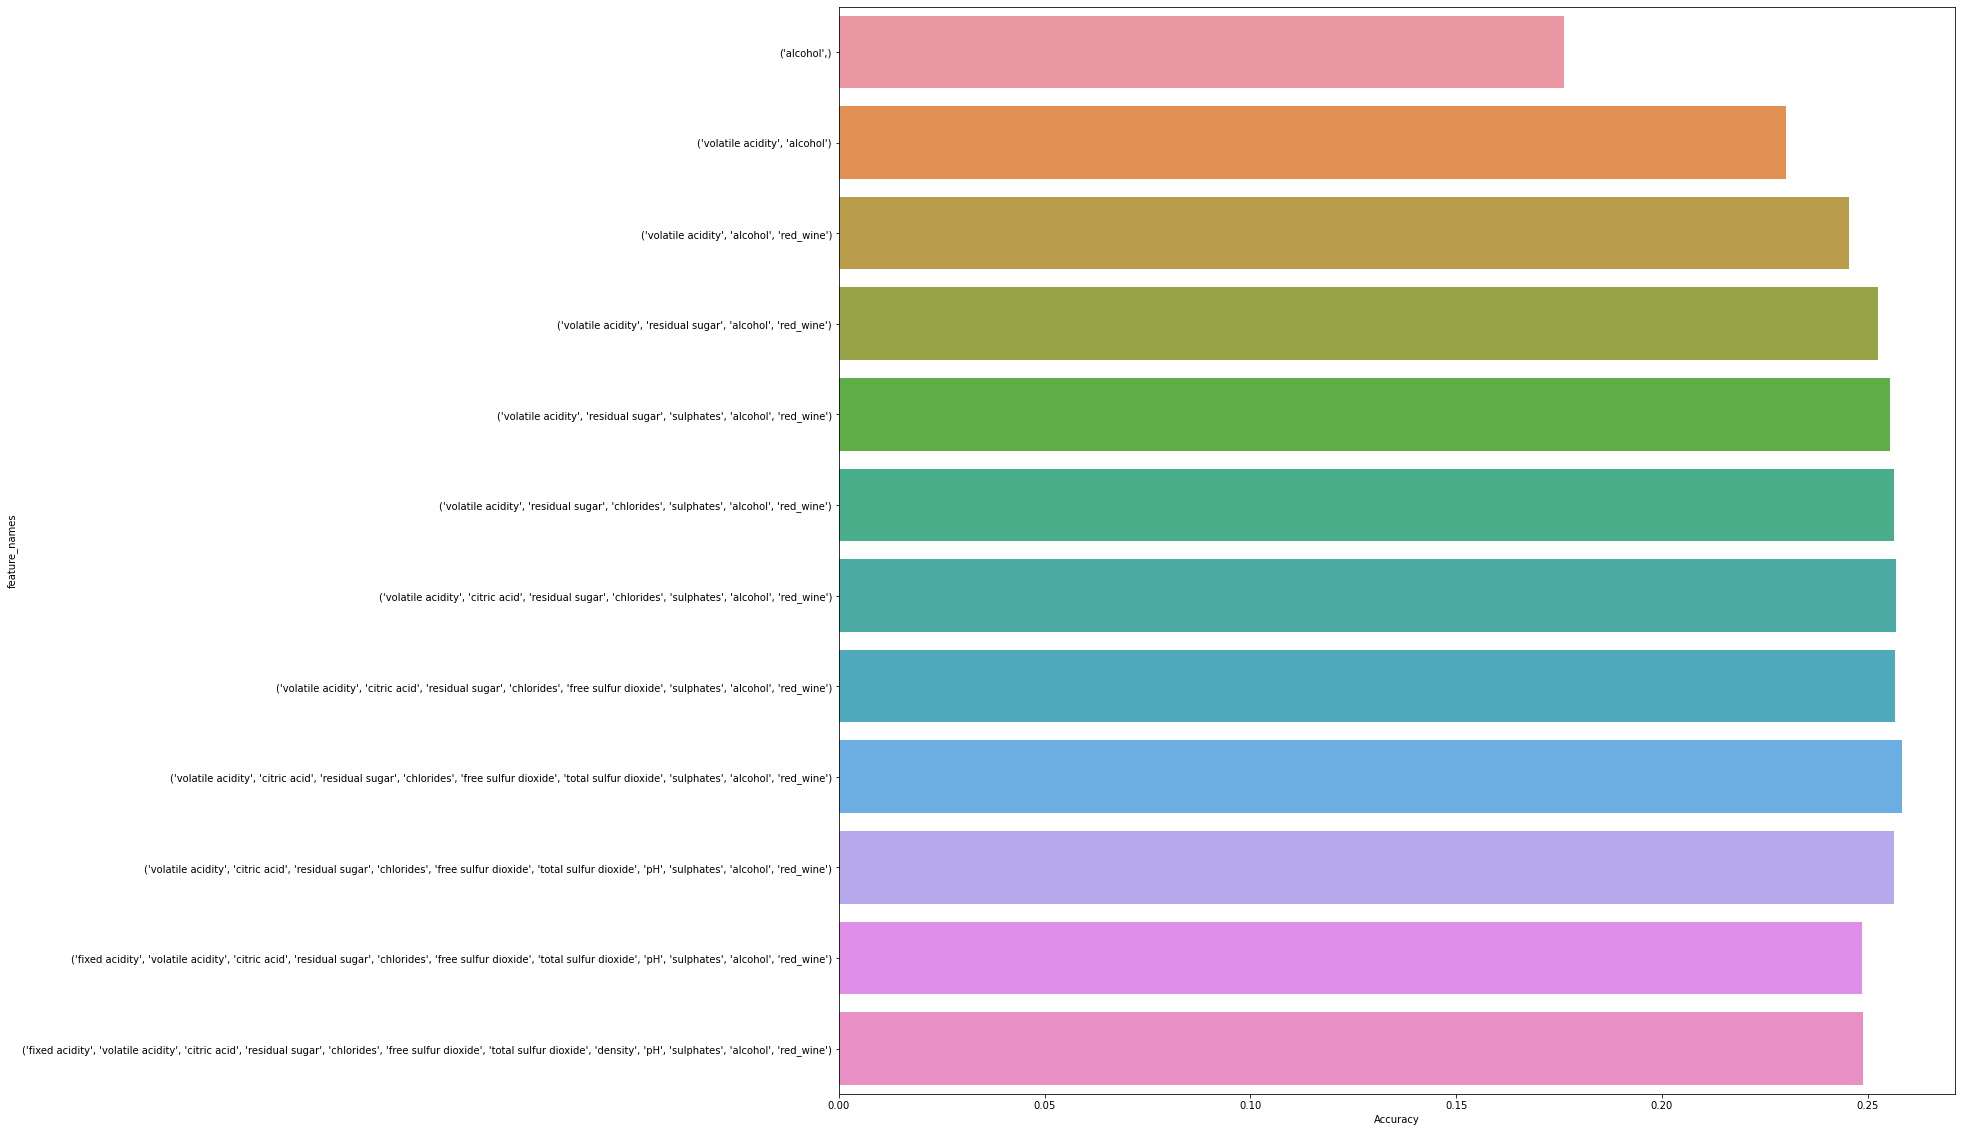

In [66]:
fig, ax = plt.subplots(figsize=(20,20))
sns.barplot(x= sfs_results['avg_score'], y= sfs_results['feature_names'],  orient='h')
ax.set_xlabel('Accuracy')

plt.show()

# OLS - Ordinary Least Squares

In [15]:
import statsmodels.api as sm

In [16]:
sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          2.735e+04
Date:                Wed, 21 Jul 2021   Prob (F-statistic):                        0.00
Time:                        19:32:55   Log-Likelihood:                         -5768.3
No. Observations:                5197   AIC:                                  1.156e+04
Df Residuals:                    5185   BIC:                                  1.164e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity           -0.0011      0.012     -0.097      0.923      -0.024       0.022
volatile acidity        -1.5875      0.091    -17.424      0.000      -1.766      -1.409
citric acid             -0.1114      0.090     -1.236      0.216      -0.288       0.065
residual sugar           0.0217      0.003      8.212      0.000       0.016       0.027
chlorides               -1.0693      0.370     -2.887      0.004      -1.795      -0.343
free sulfur dioxide      0.0053      0.001      6.302      0.000       0.004       0.007
total sulfur dioxide    -0.0017      0.000     -4.639      0.000      -0.002      -0.001
density                  2.1880      0.327      6.687      0.000       1.547       2.829
pH                       0.0784      0.081      0.969      0.333      -0.080       0.237
sulphates                0.6443      0.083      7.788      0.000       0.482       0.806
alcohol                  0.3408      0.010     33.368      0.000       0.321       0.361
red_wine                 0.1258      0.053      2.357      0.018       0.021       0.230
==============================================================================
Omnibus:                      107.147   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.752
Skew:                           0.064   Prob(JB):                     1.57e-49
Kurtosis:                       4.011   Cond. No.                     5.17e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
preds = model.predict(X_train)
preds

2433    6.094280
2001    5.218478
4959    6.186282
3864    5.569991
2364    5.902470
          ...   
1981    5.334853
2094    6.262483
4614    6.084178
5194    6.490561
3886    5.184954
Length: 5197, dtype: float64

In [19]:
from sklearn import metrics

metrics.r2_score(y_train, preds)

0.2955230282908412

In [23]:
linreg= LinearRegression()
linreg.fit(X_train, y_train)

linreg.score(X_train, y_train)

0.30158201329734824



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



